# Project: Wrangling and Analyzing Data

> By: Moyinoluwa Busola Agbaje

## Data Gathering

In the cell below, gather **all** three pieces of data for this project and load them in the notebook.
**Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [1]:
# Import Libaries

import requests
import pandas as pd

print ('Affirmative! Proceed..')
%pdb

Affirmative! Proceed..
Automatic pdb calling has been turned ON


In [2]:
twitter_data = pd.read_csv ('twitter_archive_enhanced.csv')

In [3]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image-predictions.tsv)

In [4]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# import the Tokens gotten from twitter developer portal from their saved location

import mydemo

In [7]:
# !pip3 install tweepy

In [8]:
# import libraries

import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json

print ('Setup Done!')

Setup Done!


In [9]:
# Twitter tokens, secret and keys generated from the developer's portal

consumer_key = mydemo.consumer_key
consumer_secret = mydemo.consumer_secret
access_token = mydemo.access_token
access_secret = mydemo.access_secret

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
# convert the tweet_id in the 'twitter-archive-enhanced.csv' file to a list and also do a count

tweet_ids = twitter_data.tweet_id.values
len(tweet_ids)

2356

In [11]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Rate limit reached. Sleeping for: 309


Success
1597: 686286779679375361
Success
1598: 686050296934563840
Success
1599: 686035780142297088
Success
1600: 686034024800862208
Success
1601: 686007916130873345
Success
1602: 686003207160610816
Success
1603: 685973236358713344
Success
1604: 685943807276412928
Success
1605: 685906723014619143
Success
1606: 685681090388975616
Success
1607: 685667379192414208
Success
1608: 685663452032069632
Success
1609: 685641971164143616
Success
1610: 685547936038666240
Success
1611: 685532292383666176
Success
1612: 685325112850124800
Success
1613: 685321586178670592
Success
1614: 685315239903100929
Success
1615: 685307451701334016
Success
1616: 685268753634967552
Success
1617: 685198997565345792
Success
1618: 685169283572338688
Success
1619: 684969860808454144
Success
1620: 684959798585110529
Success
1621: 684940049151070208
Success
1622: 684926975086034944
Success
1623: 684914660081053696
Success
1624: 684902183876321280
Success
1625: 684880619965411328
Success
1626: 684830982659280897
Success
16

Success
1846: 675845657354215424
Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 675707330206547968
Success
1854: 675706639471788032
Success
1855: 675534494439489536
Success
1856: 675531475945709568
Success
1857: 675522403582218240
Success
1858: 675517828909424640
Success
1859: 675501075957489664
Success
1860: 675497103322386432
Success
1861: 675489971617296384
Success
1862: 675483430902214656
Success
1863: 675432746517426176
Success
1864: 675372240448454658
Success
1865: 675362609739206656
Success
1866: 675354435921575936
Success
1867: 675349384339542016
Success
1868: 675334060156301312
Success
1869: 675166823650848770
Success
1870: 675153376133427200
Success
1871: 675149409102012420
Success
1872: 675147105808306176
Success
1873: 675146535592706048
Success
1874: 675145476954566656
Success
1875: 675135153782571009
Success
18

Success
2095: 670778058496974848
Success
2096: 670764103623966721
Success
2097: 670755717859713024
Success
2098: 670733412878163972
Success
2099: 670727704916926465
Success
2100: 670717338665226240
Success
2101: 670704688707301377
Success
2102: 670691627984359425
Success
2103: 670679630144274432
Success
2104: 670676092097810432
Success
2105: 670668383499735048
Success
2106: 670474236058800128
Success
2107: 670468609693655041
Success
2108: 670465786746662913
Success
2109: 670452855871037440
Success
2110: 670449342516494336
Success
2111: 670444955656130560
Success
2112: 670442337873600512
Success
2113: 670435821946826752
Success
2114: 670434127938719744
Success
2115: 670433248821026816
Success
2116: 670428280563085312
Success
2117: 670427002554466305
Success
2118: 670421925039075328
Success
2119: 670420569653809152
Success
2120: 670417414769758208
Success
2121: 670411370698022913
Success
2122: 670408998013820928
Success
2123: 670403879788544000
Success
2124: 670385711116361728
Success
21

Success
2344: 666073100786774016
Success
2345: 666071193221509120
Success
2346: 666063827256086533
Success
2347: 666058600524156928
Success
2348: 666057090499244032
Success
2349: 666055525042405380
Success
2350: 666051853826850816
Success
2351: 666050758794694657
Success
2352: 666049248165822465
Success
2353: 666044226329800704
Success
2354: 666033412701032449
Success
2355: 666029285002620928
Success
2356: 666020888022790149
Success
2208.0345996
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n

In [12]:
#Extracting the file by creating an empty list to store them
datafromAPI = []
#Read the created 'tweet_json.txt' line by line and extract needed data 
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    
#looping through the reading text file
    for everyline in lines:
        everyline_json = json.loads(everyline)
        id = everyline_json['id']
        favorite_count = everyline_json['favorite_count']
        retweet = everyline_json['retweet_count']
        datafromAPI.append({'tweet_id':id,
                            'favorite_count':favorite_count,
                            'retweet_count':retweet})

In [13]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 544D-964B

 Directory of C:\Users\Moyinoluwa Busola\Documents\ALX-UDACITY\PROJECT 2

29/08/2022  13:29    <DIR>          .
29/08/2022  13:29    <DIR>          ..
09/07/2022  16:06    <DIR>          .ipynb_checkpoints
09/07/2022  16:08    <DIR>          __pycache__
25/08/2022  14:19           579,706 act_report.html
25/08/2022  09:22             3,485 act_report.ipynb
09/07/2022  16:58           335,079 image_predictions.tsv
29/08/2022  13:11           335,079 image-predictions.tsv
09/07/2022  16:06               872 mydemo.ipynb
09/07/2022  16:07               297 mydemo.py
27/07/2022  21:09             1,378 tweet_json.ipynb
29/08/2022  13:48        10,628,480 tweet_json.txt
29/08/2022  11:44            68,414 twitter_api.csv
04/07/2022  09:55             1,814 twitter_api.txt
28/06/2022  09:14           915,692 twitter_archive_enhanced.csv
25/08/2022  13:38         3,016,433 twitter_archive_master.csv
25/08/2022  14:22         2,

In [14]:
# convert the read text file in the cell above from a dictionary to dataframe as instructed
df_tweet = pd.DataFrame(datafromAPI, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df_tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33710,6975
1,892177421306343426,29238,5276
2,891815181378084864,21982,3466
3,891689557279858688,36811,7197
4,891327558926688256,35193,7721


In [15]:
df_tweet.shape

(2327, 3)

In [16]:
# save and read datafromAPI csv

df_tweet.to_csv('twitter_api.csv', index = False)
apiData = pd.read_csv('twitter_api.csv')

# Assessing Data

## Visual Assessment

In [17]:
twitter_data.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
426,821407182352777218,NaN,NaN,2017-01-17 17:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,None,None,None
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,11,10,None,None,None,None,None
619,796149749086875649,NaN,NaN,2016-11-09 00:37:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She just turned on the news. Off...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,None,None,None,None


In [18]:
image_prediction = pd.read_csv('image_predictions.tsv', sep ='\t')
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
908,700505138482569216,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,1,bath_towel,0.449684,False,Norwegian_elkhound,0.160205,True,Great_Dane,0.048666,True
819,692905862751522816,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,1,Mexican_hairless,0.162638,True,Doberman,0.156287,True,Rhodesian_ridgeback,0.081478,True
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False


In [19]:
apiData.head(10)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33710,6975
1,892177421306343426,29238,5276
2,891815181378084864,21982,3466
3,891689557279858688,36811,7197
4,891327558926688256,35193,7721
5,891087950875897856,17754,2589
6,890971913173991426,10336,1648
7,890729181411237888,56686,15689
8,890609185150312448,24433,3605
9,890240255349198849,27861,6074


In [20]:
apiData.shape

(2327, 3)

## Programmatic Assessment

After doing the visual assessment for the three datadet and identifying a lot of tidiness issues, comes the deeper dive into the programmatic assessment:

In [21]:
apiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
# Test if the missing expanded URLs are a problem.
# If there is a link in the tweet's text and no expanded URL then there is an issue

nullvalues = twitter_data[twitter_data['expanded_urls'].isnull()]
nullvalues['text'].str.contains('http').sum()

0

In [25]:
# check for duplicated IDs in the feeds dataframe

twitter_data[twitter_data.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality issues
<ol>
    <li>Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls in the twitter_archive Table.</li>
    <li>Some uppercase and lowercase letters identified in columns 'p1', 'p2', and 'p3' in the image_prediction Table.</li>
    <li>Remove the 'source' column in the twitter_archive Table.</li>
    <li>Drops rows with duplicates in the jpg_url column.</li>
    <li>Change timestamp format from "2017-07-26 15:59:51+00:00" to "2017, 2016, 2015... </li>
    <li>The column 'id' should be changed to tweet_id in the newapi Table.</li>
    <li>Clean ratings numerator and denominator.</li>
</ol>

### Tidiness issues
<ol>
    <li>Combed all three tables into a single one.</li>
    <li>Spread Dog tests in three columns.</li>
</ol>

### Data Cleaning

Before moving any further, we need to make copies of the data. Here, the data frame is still the same but from the #QUALITY ISSUES; clean_newapi is the same as newapi, clean_image is the same as image_prediction, and clean_tweet is the same as twitter_archive respectively as shown below:

In [26]:
# Make copies of original pieces of data

clean_newapi = apiData.copy()
clean_image = image_prediction.copy()
clean_tweet = twitter_data.copy()

In [27]:
# Checking the lenght of df clean
df_len = twitter_data.shape[0]
df_len

2356

### Quality issues

##### Issue 1

181 retweets present but we are only interested in original tweets

Solution: Drop all rows containing retweets, where these columns will be NaN:

#### Code

In [28]:
print("number of retweets:  {}".format(sum(clean_tweet.retweeted_status_id.notnull())))

number of retweets:  181


In [29]:
clean_tweet = clean_tweet[clean_tweet.retweeted_status_id.isna()]

In [30]:
clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [31]:
# confirm the rows are dropped; compare with original table length
print("number of rows dropped:  {}".format(df_len - clean_tweet.shape[0]))

# reset the variable for length of the archive
df_len = clean_tweet.shape[0]

number of rows dropped:  181


#### Test

In [32]:
clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

##### Issue 2

There are 78 reply Tweets, we’re only interested in “original Tweets”.

Solution: Drop all rows that are replies and those that have non-null values in these columns (in_reply_to_status_id and in_reply_to_user_id).

#### Code

In [33]:
print("number of replies: {}".format(sum(clean_tweet.in_reply_to_status_id.notnull())))

number of replies: 78


In [34]:
clean_tweet = clean_tweet[clean_tweet.in_reply_to_status_id.isna()]

##### Test

In [35]:
clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [36]:
# confirm the rows are dropped; compare with previous table length
print("number of rows dropped: {}".format(df_len - clean_tweet.shape[0]))

# reset the variable for length of the archive
df_len = clean_tweet.shape[0]

number of rows dropped: 78


##### Issue 3
Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls in the twitter_archive Table.

Solution: The columns having missing values (Nan) would be droped with the .dropna() function.

#### Code

In [37]:
clean_tweet = clean_tweet.drop(columns=["in_reply_to_status_id",
                                        "in_reply_to_user_id",
                                        "retweeted_status_id",
                                        "retweeted_status_user_id",
                                        "retweeted_status_timestamp"], axis=1)

#### Test

In [38]:
# Check the information of the dataframe

clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


##### Issue 4
Some uppercase and lowercase letters identified in columns 'p1', 'p2', and 'p3' in the image_prediction Table.

Solution: Using the .lower() to changes all series to lower case letters which is also a string, passing .str would handle the issue.

#### Code

In [39]:
clean_image['p1'] = clean_image['p1'].str.lower()
clean_image['p2'] = clean_image['p2'].str.lower()
clean_image['p3'] = clean_image['p3'].str.lower()

#### Test

In [40]:
clean_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1975,870063196459192321,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,comic_book,0.534409,False,envelope,0.280722,False,book_jacket,0.043785,False
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,lhasa,0.582330,True,shih-tzu,0.166192,True,dandie_dinmont,0.089688,True
1004,708845821941387268,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,1,schipperke,0.745640,True,kelpie,0.167853,True,boston_bull,0.014763,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
220,670086499208155136,https://pbs.twimg.com/media/CUygHhFXAAAwNXv.jpg,1,german_short-haired_pointer,0.273492,True,staffordshire_bullterrier,0.132944,True,bluetick,0.124562,True


##### Issue 6
Remove the 'source' column in the twitter_archive Table.

Solution: Drop the 'source' column with the .drop()

#### Code

In [41]:
clean_tweet.drop(columns='source', axis = 1 , inplace =True)

#### Test

In [42]:
clean_tweet.head(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Issue 6
Drops rows with duplicates in the jpg_url column.

Solution: Use the drop_duplicates() method to drop duplicates

#### Code

In [43]:
#Check duplicates

clean_image.jpg_url.duplicated().sum()

66

In [44]:
# drop duplicated rows

clean_image = clean_image.drop_duplicates('jpg_url')

#### Test

In [45]:
clean_image.jpg_url.duplicated().sum()

0

##### Issue 7
Change timestamp format from "2017-07-26 15:59:51+00:00" to "2017, 2016, 2015...

Solution: Creating a new colum year and use the to convert the pd.DatetimeIndex().year

#### Code

In [46]:
clean_tweet['year'] = pd.DatetimeIndex(clean_tweet['timestamp']).year

#### Test

In [47]:
clean_tweet.year.unique()

array([2017, 2016, 2015], dtype=int64)

##### Issue 8
The column 'id' should be changed to tweet_id in the newapi Table.

Solution: The column 'id' should be changed to tweet_id in the newapi Table

#### Code

In [48]:
clean_newapi = clean_newapi.rename(columns = {'id':'tweet_id'})

#### Test

In [49]:
#Use the .sample() method to output the columns and five random samples

clean_newapi.sample(7)

,tweet_id,favorite_count,retweet_count
1903,674024893172875264,1582,1083
268,839239871831150596,25172,5924
2158,668979806671884288,702,292
1441,694183373896572928,2707,842
1027,742385895052087300,6273,1772
1410,696900204696625153,2914,935
918,752568224206688256,5106,2078


##### Issue 9
Clean ratings numerator and denominator.

Solution A: Some tweets have wrong values extracted for rating and some text contains the Tweeter's rating. Manually fix:
- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10

#### Code

In [50]:
masker_row = clean_tweet.tweet_id == 740373189193256964
clean_tweet.loc[masker_row, 'rating_numerator'] = 14
clean_tweet.loc[masker_row, 'rating_denominator'] = 10

In [51]:
masker_row = clean_tweet.tweet_id == 716439118184652801
clean_tweet.loc[masker_row, 'rating_numerator'] = 11
clean_tweet.loc[masker_row, 'rating_denominator'] = 10

In [52]:
masker_row = clean_tweet.tweet_id == 682962037429899265
clean_tweet.loc[masker_row, 'rating_numerator'] = 10
clean_tweet.loc[masker_row, 'rating_denominator'] = 10

In [53]:
masker_row = clean_tweet.tweet_id == 666287406224695296
clean_tweet.loc[masker_row, 'rating_numerator'] = 9
clean_tweet.loc[masker_row, 'rating_denominator'] = 10

#### Test

In [54]:
masker_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
clean_tweet[(clean_tweet.tweet_id == 740373189193256964) | \
              (clean_tweet.tweet_id == 716439118184652801) | \
              (clean_tweet.tweet_id == 682962037429899265) | \
              (clean_tweet.tweet_id == 666287406224695296) ][masker_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14,10
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9,10


##### Issue 10
Some tweets with rating_denominator NOT equal to 10; multiple dogs or no valid rating.

Solution: Drop the remaining tweets with rating_denominator values that are NOT equal to 10.

#### Code

In [55]:
# showing the denominators
clean_tweet.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        2
40        1
20        1
10     2084
7         1
Name: rating_denominator, dtype: int64

In [56]:
clean_tweet = clean_tweet[clean_tweet.rating_denominator == 10]

#### Test

In [57]:
# The values in the column should be = 10
clean_tweet.rating_denominator.value_counts().sort_index(ascending = False)

10    2084
Name: rating_denominator, dtype: int64

##### Issue 11

There are 5 tweets with rating_numerator >= 15, which either don't make sense or are huge.

Solution: Drop tweets that have rating_numerator >= 15.

#### Code

In [58]:
# Show numerators greater than 15
mask = clean_tweet.rating_numerator >= 15
clean_tweet[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [59]:
clean_tweet = clean_tweet[clean_tweet.rating_numerator < 15]

#### Test

In [60]:
# display ALL numerators
clean_tweet.rating_numerator.value_counts().sort_index(ascending = False)

14     39
13    287
12    486
11    414
10    437
9     153
8      98
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Tidiness

##### Tidiness issue 1
Combed all three tables into a single one.

#### Code

In [61]:
# Bring out the unique names

clean_tweet.name.sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [62]:
# Import the numpy library
import numpy as np

#Use the replace() method to replace the dogs with unofficial names to no-name
clean_tweet.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very','this','None'], 'no-name', inplace=True)

In [63]:
clean_tweet.name.sort_values().value_counts()

no-name    690
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Ace          1
Kellogg      1
Ken          1
Kendall      1
Mattie       1
Name: name, Length: 931, dtype: int64

In [64]:
#Drop the 'None' rows

clean_tweet.drop(clean_tweet.query('(name == "None")').index ,inplace=True)
clean_tweet.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017


In [65]:
# Check informations of the columns to be merged

clean_newapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [66]:
# Merge clean_tweet, and clean_newapi using 'tweet_id' they have in common

combined = pd.merge(clean_tweet, clean_newapi, on = "tweet_id", how = "left")
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2078
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2079 non-null   int64  
 1   timestamp           2079 non-null   object 
 2   text                2079 non-null   object 
 3   expanded_urls       2076 non-null   object 
 4   rating_numerator    2079 non-null   int64  
 5   rating_denominator  2079 non-null   int64  
 6   name                2079 non-null   object 
 7   doggo               2079 non-null   object 
 8   floofer             2079 non-null   object 
 9   pupper              2079 non-null   object 
 10  puppo               2079 non-null   object 
 11  year                2079 non-null   int64  
 12  favorite_count      2071 non-null   float64
 13  retweet_count       2071 non-null   float64
dtypes: float64(2), int64(4), object(8)
memory usage: 243.6+ KB


In [67]:
# Merge the combined and clean_image into a single data frame

combined_archive = pd.merge(combined, clean_image, on='tweet_id', how ='inner')
combined_archive.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

#### Test

In [68]:
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1953 non-null   int64  
 1   timestamp           1953 non-null   object 
 2   text                1953 non-null   object 
 3   expanded_urls       1953 non-null   object 
 4   rating_numerator    1953 non-null   int64  
 5   rating_denominator  1953 non-null   int64  
 6   name                1953 non-null   object 
 7   doggo               1953 non-null   object 
 8   floofer             1953 non-null   object 
 9   pupper              1953 non-null   object 
 10  puppo               1953 non-null   object 
 11  year                1953 non-null   int64  
 12  favorite_count      1945 non-null   float64
 13  retweet_count       1945 non-null   float64
 14  jpg_url             1953 non-null   object 
 15  img_num             1953 non-null   int64  
 16  p1    

In [69]:
combined_archive.shape

(1953, 25)

##### Tidiness issue 2
Spread Dog tests in three columns.

Solution: Combine the dog names in one single series; value_name='dogtypes'

#### Code

In [70]:
combined_archive = pd.melt(combined_archive, id_vars=['tweet_id','timestamp', 'text','expanded_urls',
                                                      'rating_numerator','rating_denominator','name','favorite_count',
                                                      'retweet_count', 'jpg_url','img_num', 'p1',
                                                      'p1_conf','p1_dog', 'p2', 'p2_conf',
                                                      'p2_dog', 'p3', 'p3_conf','p3_dog'], value_name='dogtypes')

#### Test

In [71]:
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9765 entries, 0 to 9764
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            9765 non-null   int64  
 1   timestamp           9765 non-null   object 
 2   text                9765 non-null   object 
 3   expanded_urls       9765 non-null   object 
 4   rating_numerator    9765 non-null   int64  
 5   rating_denominator  9765 non-null   int64  
 6   name                9765 non-null   object 
 7   favorite_count      9725 non-null   float64
 8   retweet_count       9725 non-null   float64
 9   jpg_url             9765 non-null   object 
 10  img_num             9765 non-null   int64  
 11  p1                  9765 non-null   object 
 12  p1_conf             9765 non-null   float64
 13  p1_dog              9765 non-null   bool   
 14  p2                  9765 non-null   object 
 15  p2_conf             9765 non-null   float64
 16  p2_dog

In [72]:
combined_archive =  combined_archive.drop_duplicates()

In [73]:
# Drop name dog with no name

combined_archive.drop(combined_archive.query('(name == "no-name")').index ,inplace=True)

In [74]:
# Check

combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6740 entries, 0 to 9734
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            6740 non-null   int64  
 1   timestamp           6740 non-null   object 
 2   text                6740 non-null   object 
 3   expanded_urls       6740 non-null   object 
 4   rating_numerator    6740 non-null   int64  
 5   rating_denominator  6740 non-null   int64  
 6   name                6740 non-null   object 
 7   favorite_count      6705 non-null   float64
 8   retweet_count       6705 non-null   float64
 9   jpg_url             6740 non-null   object 
 10  img_num             6740 non-null   int64  
 11  p1                  6740 non-null   object 
 12  p1_conf             6740 non-null   float64
 13  p1_dog              6740 non-null   bool   
 14  p2                  6740 non-null   object 
 15  p2_conf             6740 non-null   float64
 16  p2_dog

In [75]:
clean_tweet[clean_tweet.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Moyinoluwa Busola\AppData\Local\Temp\ipykernel_15612\3863844937.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  clean_tweet[clean_tweet.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5


In [76]:
combined_archive.dogtypes

0       None
1       None
2       None
3       None
4       None
        ... 
9724    2015
9726    2015
9727    2015
9728    2015
9734    2015
Name: dogtypes, Length: 6740, dtype: object

In [77]:
twitter_data.iloc[45:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None
48,882992080364220416,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,None,None,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


# Data Storing

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
combined_archive.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization**.

## Insights

<ol>
    <li>TOP 20 DOG NAMES WITH RETWEETS RATE</li>
    <li>DOG CATEGORIES WITH FAVOURITE COUNTS</li>
    <li>DOG BREED WITH HIGHEST MEAN RATE NUMERATOR, AND HIGHEST VALUE COUNTS</li>
    <li>DOG WITH THE MOST POPULAR NAME</li>
</ol>

### Insight 1
TOP 20 DOG NAMES WITH RETWEETS RATE

In [79]:
#Bring out the two columns needed

combined_archive[["name","retweet_count"]].head(20)

,name,retweet_count
0,Phineas,6975.0
1,Tilly,5276.0
2,Archie,3466.0
3,Darla,7197.0
4,Franklin,7721.0
6,Jax,1648.0
8,Zoey,3605.0
9,Cassie,6074.0
10,Koda,6115.0
11,Bruno,4142.0


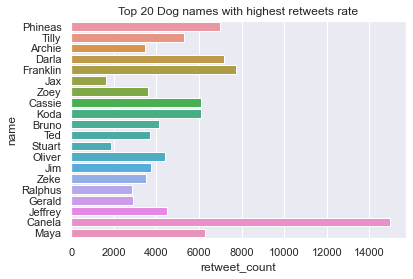

In [80]:
#Plot name to retweet count

import seaborn as sns
sns.set()

sns.barplot(y="name", x="retweet_count", data = combined_archive[:20]).set_title('Top 20 Dog names with highest retweets rate');

After visualizaion, the Sunny has the highest retweet count with value 21794.0, Barney took the second highest with value 13076.0 followed by the third runner up Cupid with value 11878.0

### Insight 2
DOG CATEGORIES WITH FAVOURITE COUNTS

In [81]:
combined_archive.dogtypes.unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo', 2017, 2016, 2015],
      dtype=object)

In [82]:
# Drop duplicates with dogtypes "None,2017,2016,2015" 

combined_archive.drop(combined_archive.query('(dogtypes == "None")').index ,inplace=True)

In [83]:
combined_archive.drop(combined_archive.query('(dogtypes == 2017)').index ,inplace=True)

In [84]:
combined_archive.drop(combined_archive.query('(dogtypes == 2016)').index ,inplace=True)

In [85]:
combined_archive.drop(combined_archive.query('(dogtypes == 2015)').index ,inplace=True)

In [86]:
combined_archive.dogtypes.unique()

array(['doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [88]:
# !pip install seaborn

In [89]:
# Import visual libraries

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

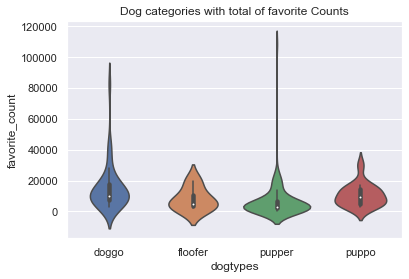

In [90]:
# Plot Dogtypes with favourite count hue="species"

sns.violinplot(data=combined_archive, x="dogtypes", y="favorite_count")
plt.title('Dog categories with total of favorite Counts');

In [ ]:
#Test

combined_archive.dogtypes.value_counts()

In the part above, I found out that the category which recorded the highest rate of favourites, after removing Null values, and visualizing the chart, the pupper dog recorded the highest rate, then doggo, puppo, and floofer.

### Insight 3
DOG BREED WITH HIGHEST MEAN RATE NUMERATOR, AND HIGHEST VALUE COUNTS

In [91]:
# Find the dog breed with the highest numerator

combined_archive.groupby('p1')['rating_numerator'].mean().nlargest(10)

p1
bedlington_terrier        14.0
irish_setter              14.0
pedestal                  14.0
prison                    14.0
standard_poodle           14.0
borzoi                    13.0
curly-coated_retriever    13.0
dandie_dinmont            13.0
italian_greyhound         13.0
cardigan                  12.5
Name: rating_numerator, dtype: float64

In [92]:
# Dog breed with highest value counts of p1

combined_archive.p1.value_counts()

golden_retriever       15
pembroke                6
pomeranian              6
labrador_retriever      6
pug                     5
                       ..
pedestal                1
wooden_spoon            1
irish_water_spaniel     1
shetland_sheepdog       1
malamute                1
Name: p1, Length: 99, dtype: int64

In [93]:
# Find the dog breed with the highest numerator

combined_archive.groupby('p2')['rating_numerator'].mean().nlargest(15)

p2
fountain                     14.000000
ice_bear                     14.000000
palace                       14.000000
vizsla                       14.000000
maltese_dog                  13.000000
staffordshire_bullterrier    13.000000
whippet                      13.000000
wire-haired_fox_terrier      13.000000
malinois                     12.500000
pembroke                     12.500000
samoyed                      12.500000
flat-coated_retriever        12.333333
tibetan_mastiff              12.333333
academic_gown                12.000000
bloodhound                   12.000000
Name: rating_numerator, dtype: float64

In [94]:
# Dog breed with highest value counts of p2

combined_archive.p2.value_counts()

labrador_retriever    11
french_bulldog         6
cocker_spaniel         6
shetland_sheepdog      5
golden_retriever       5
                      ..
badger                 1
irish_setter           1
spatula                1
grey_fox               1
gibbon                 1
Name: p2, Length: 98, dtype: int64

In [95]:
# Find the dog breed with the highest numerator

combined_archive.groupby('p3')['rating_numerator'].mean().nlargest(15)

p3
brass                          14.0
umbrella                       14.0
english_setter                 13.0
ibizan_hound                   13.0
irish_water_spaniel            13.0
newfoundland                   13.0
norfolk_terrier                13.0
redbone                        13.0
saluki                         13.0
toy_poodle                     13.0
west_highland_white_terrier    13.0
chesapeake_bay_retriever       12.5
clumber                        12.5
italian_greyhound              12.5
shetland_sheepdog              12.5
Name: rating_numerator, dtype: float64

In [96]:
# Dog breed with highest value counts of p3

combined_archive.p3.value_counts()

malamute                  7
kelpie                    6
pug                       5
labrador_retriever        5
kuvasz                    4
                         ..
shopping_cart             1
grand_piano               1
curly-coated_retriever    1
toy_poodle                1
eskimo_dog                1
Name: p3, Length: 112, dtype: int64

I also checked the dog breed in p3 with the highest 10-15 numerators using their mean count. The lhasa has 14.67 mean rating numerator as well as the malamute appeared more than the others with count 7.

### Insight 4
DOG WITH THE MOST POPULAR NAME

In [97]:
# Check value couunt

combined_archive.name.value_counts()

Cooper     3
Pinot      2
Sampson    2
Milo       2
Dido       2
          ..
Laika      1
Huck       1
Winnie     1
Chelsea    1
Bayley     1
Name: name, Length: 166, dtype: int64

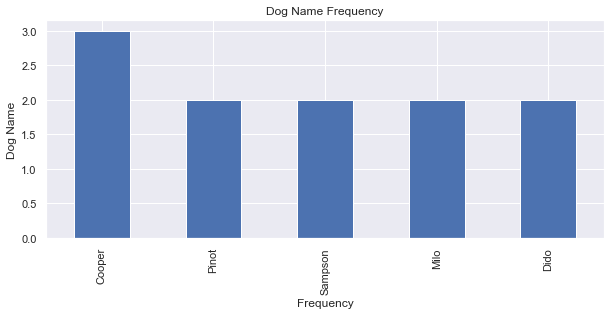

In [98]:
# Plot the top 5 Dog names by frequency

plt.figure(figsize=(10, 4))
dogname = combined_archive.name.value_counts().nlargest(5).plot(kind = 'bar');
dogname.set_title('Dog Name Frequency');
dogname.set_xlabel('Frequency');
dogname.set_ylabel('Dog Name');

In [99]:
#test

combined_archive.name.value_counts()

Cooper     3
Pinot      2
Sampson    2
Milo       2
Dido       2
          ..
Laika      1
Huck       1
Winnie     1
Chelsea    1
Bayley     1
Name: name, Length: 166, dtype: int64

After dropping the 'no-name' rows from the name column, the Cooper had the highest frequency with 13.